### Prediction with Location Data distance of flats from MRT stations (Mass Rapid Transit System) and also from CBD (Central Business District).

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\SANTHOSH RAJENDRAN\Desktop\GUVI Python\Project-Singaporeflatresale\Final_Singapore_flat_resale_price_file.csv")
df=df.drop_duplicates()
df.shape

(217556, 20)

In [3]:
df.isna().sum()

latitude               0
longitude              0
blk_no                 0
road_name              0
postal_code            0
address                0
cbd_dist               0
min_dist_mrt           0
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
lease_remain_years     0
dtype: int64

In [4]:
#spliting year and month
df[['transaction_year', 'transaction_month']] =df['month'].str.split('-', expand=True)

In [5]:
df.drop('month', axis = 1, inplace= True)

In [6]:
df.head(2).transpose()

,0,1
latitude,1.375097,1.375097
longitude,103.837619,103.837619
blk_no,174,174
road_name,ANG MO KIO AVENUE 4,ANG MO KIO AVENUE 4
postal_code,560174,560174
address,174 ANG MO KIO AVE 4,174 ANG MO KIO AVE 4
cbd_dist,10296.855747,10296.855747
min_dist_mrt,7719.813622,7719.813622
town,ANG MO KIO,ANG MO KIO
flat_type,3 ROOM,3 ROOM


In [7]:
df.dtypes

latitude               float64
longitude              float64
blk_no                  object
road_name               object
postal_code              int64
address                 object
cbd_dist               float64
min_dist_mrt           float64
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
lease_remain_years       int64
transaction_year        object
transaction_month       object
dtype: object

In [10]:
df['transaction_year']=df['transaction_year'].astype(int)
df['transaction_month']=df['transaction_month'].astype(int)
df['postal_code'] = df['postal_code'].astype('object')
df['lease_commence_date'] = df['lease_commence_date'].astype('object')

In [11]:
# Splitting storey range column
storey=df['storey_range'].str.split(' TO ',expand = True)
storey.head()

,0,1
0,07,09
1,10,12
2,04,06
3,07,09
4,04,06


In [17]:
# Creating the storey maximum values as column
df.insert(loc = 7,
          column = 'storey_min',
          value = storey[0])

ValueError: cannot insert storey_max, already exists

In [13]:
# Creating the storey maximum values as column
df.insert(loc = 7,
          column = 'storey_max',
          value = int(storey[1])

In [18]:
df['storey_min']=df['storey_min'].astype(int)
df['storey_max']=df['storey_max'].astype(int)

In [19]:
df

,latitude,longitude,blk_no,road_name,postal_code,address,storey_min,storey_max,cbd_dist,min_dist_mrt,...,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years,transaction_year,transaction_month
0,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,7,9,10296.855747,7719.813622,...,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70,61,2015,1
1,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10,12,10296.855747,7719.813622,...,ANG MO KIO AVE 4,10 TO 12,60.0,Improved,1986,275000.0,69,61,2015,12
2,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,4,6,10296.855747,7719.813622,...,ANG MO KIO AVE 4,04 TO 06,69.0,Improved,1986,310000.0,68,61,2016,5
3,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,7,9,10296.855747,7719.813622,...,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,253000.0,68,61,2016,6
4,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,4,6,10296.855747,7719.813622,...,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,290000.0,68,61,2016,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217551,1.323461,103.890038,83B,CIRCUIT ROAD,372083,83B CIRCUIT RD,4,6,6213.076992,4312.135688,...,CIRCUIT RD,04 TO 06,96.0,Model A,2020,935000.0,95 years 01 month,95,2024,5
217552,1.323461,103.890038,83B,CIRCUIT ROAD,372083,83B CIRCUIT RD,13,15,6213.076992,4312.135688,...,CIRCUIT RD,13 TO 15,96.0,Model A,2020,960000.0,95 years 01 month,95,2024,5
217553,1.353327,103.739336,460C,BUKIT BATOK WEST AVENUE 9,653460,460C BT BATOK WEST AVE 9,16,18,14687.959399,13806.706183,...,BT BATOK WEST AVE 9,16 TO 18,48.0,2-room,2020,350000.0,95 years 01 month,95,2024,5
217554,1.341003,103.742339,240A,JURONG EAST AVENUE 1,601240,240A JURONG EAST AVE 1,10,12,13718.003504,13045.392845,...,JURONG EAST AVE 1,10 TO 12,68.0,Model A,2020,520000.0,95 years 01 month,95,2024,5


In [21]:
df.to_csv('DummyTraining_Singapore_flat_resale_price_file.csv', index = False)

In [20]:
df.dtypes

latitude               float64
longitude              float64
blk_no                  object
road_name               object
postal_code             object
address                 object
storey_min               int32
storey_max               int32
cbd_dist               float64
min_dist_mrt           float64
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date     object
resale_price           float64
remaining_lease         object
lease_remain_years       int64
transaction_year         int32
transaction_month        int32
dtype: object

In [10]:
import statistics

def get_median(x):
    split_list = x.split(' TO ')
    float_list = [float(i) for i in split_list]
    median = statistics.median(float_list)
    return median

df['storey_median'] = df['storey_range'].apply(lambda x: get_median(x))
df

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,town,flat_type,...,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years,resale_year,resale_month,storey_median
0,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,7719.813622,ANG MO KIO,3 ROOM,...,07 TO 09,60.0,Improved,1986,255000.0,70,61,2015,1,8.0
1,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,7719.813622,ANG MO KIO,3 ROOM,...,10 TO 12,60.0,Improved,1986,275000.0,69,61,2015,12,11.0
2,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,7719.813622,ANG MO KIO,3 ROOM,...,04 TO 06,69.0,Improved,1986,310000.0,68,61,2016,5,5.0
3,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,7719.813622,ANG MO KIO,2 ROOM,...,07 TO 09,45.0,Improved,1986,253000.0,68,61,2016,6,8.0
4,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,7719.813622,ANG MO KIO,3 ROOM,...,04 TO 06,61.0,Improved,1986,290000.0,68,61,2016,11,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217551,1.323461,103.890038,83B,CIRCUIT ROAD,372083,83B CIRCUIT RD,6213.076992,4312.135688,GEYLANG,4 ROOM,...,04 TO 06,96.0,Model A,2020,935000.0,95 years 01 month,95,2024,5,5.0
217552,1.323461,103.890038,83B,CIRCUIT ROAD,372083,83B CIRCUIT RD,6213.076992,4312.135688,GEYLANG,4 ROOM,...,13 TO 15,96.0,Model A,2020,960000.0,95 years 01 month,95,2024,5,14.0
217553,1.353327,103.739336,460C,BUKIT BATOK WEST AVENUE 9,653460,460C BT BATOK WEST AVE 9,14687.959399,13806.706183,BUKIT BATOK,2 ROOM,...,16 TO 18,48.0,2-room,2020,350000.0,95 years 01 month,95,2024,5,17.0
217554,1.341003,103.742339,240A,JURONG EAST AVENUE 1,601240,240A JURONG EAST AVE 1,13718.003504,13045.392845,JURONG EAST,3 ROOM,...,10 TO 12,68.0,Model A,2020,520000.0,95 years 01 month,95,2024,5,11.0


In [11]:
scope_df = df[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']]
scope_df

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,10296.855747,7719.813622,60.0,61,8.0,255000.0
1,10296.855747,7719.813622,60.0,61,11.0,275000.0
2,10296.855747,7719.813622,69.0,61,5.0,310000.0
3,10296.855747,7719.813622,45.0,61,8.0,253000.0
4,10296.855747,7719.813622,61.0,61,5.0,290000.0
...,...,...,...,...,...,...
217551,6213.076992,4312.135688,96.0,95,5.0,935000.0
217552,6213.076992,4312.135688,96.0,95,14.0,960000.0
217553,14687.959399,13806.706183,48.0,95,17.0,350000.0
217554,13718.003504,13045.392845,68.0,95,11.0,520000.0


In [12]:
scope_df = scope_df.drop_duplicates()
scope_df

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,10296.855747,7719.813622,60.0,61,8.0,255000.0
1,10296.855747,7719.813622,60.0,61,11.0,275000.0
2,10296.855747,7719.813622,69.0,61,5.0,310000.0
3,10296.855747,7719.813622,45.0,61,8.0,253000.0
4,10296.855747,7719.813622,61.0,61,5.0,290000.0
...,...,...,...,...,...,...
217551,6213.076992,4312.135688,96.0,95,5.0,935000.0
217552,6213.076992,4312.135688,96.0,95,14.0,960000.0
217553,14687.959399,13806.706183,48.0,95,17.0,350000.0
217554,13718.003504,13045.392845,68.0,95,11.0,520000.0


In [13]:
from scipy.stats import skew
scope_df.select_dtypes(include=['int64', 'float64']).skew()

cbd_dist             -0.532375
min_dist_mrt         -0.326861
floor_area_sqm        0.259520
lease_remain_years    0.131943
storey_median         1.619656
resale_price          1.005346
dtype: float64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

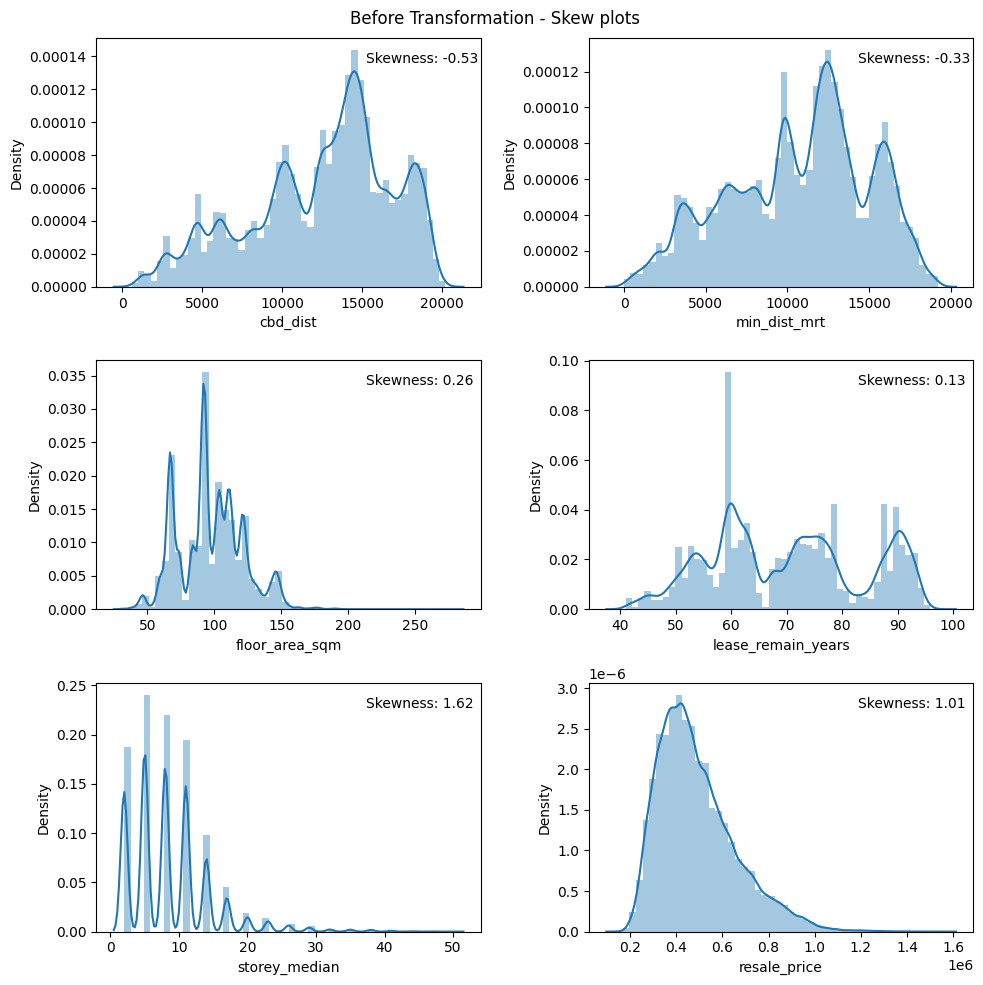

In [15]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
sns.distplot(scope_df['cbd_dist'])
skew_value = np.round(scope_df['cbd_dist'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
plt.subplot(3,2,2)
sns.distplot(scope_df['min_dist_mrt'])
skew_value = np.round(scope_df['min_dist_mrt'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
plt.subplot(3,2,3)
sns.distplot(scope_df['floor_area_sqm'])
skew_value = np.round(scope_df['floor_area_sqm'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
plt.subplot(3,2,4)
sns.distplot(scope_df['lease_remain_years'])
skew_value = np.round(scope_df['lease_remain_years'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
plt.subplot(3,2,5)
sns.distplot(scope_df['storey_median'])
skew_value = np.round(scope_df['storey_median'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
plt.subplot(3,2,6)
sns.distplot(scope_df['resale_price'])
skew_value = np.round(scope_df['resale_price'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
plt.suptitle('Before Transformation - Skew plots')
plt.tight_layout()
plt.show()

In [16]:
df2 = scope_df.copy()

In [17]:
columns = ['floor_area_sqm', 'storey_median', 'resale_price']

In [18]:
def log_transformation(column):
  for i in column:
    df2[i] = np.log(df2[i])

log_transformation(columns)

### Before Treating Outliers

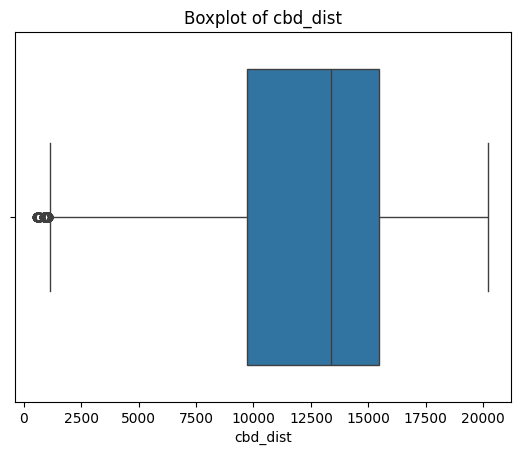

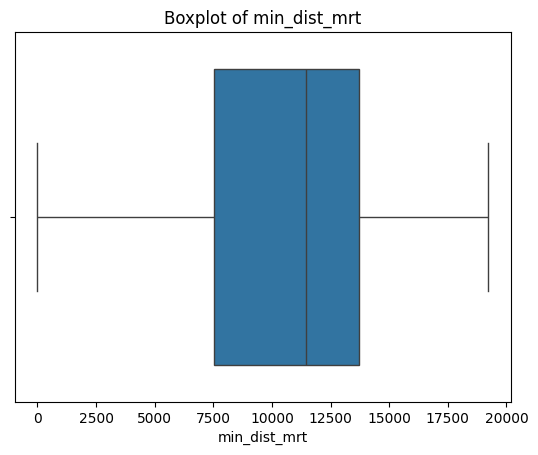

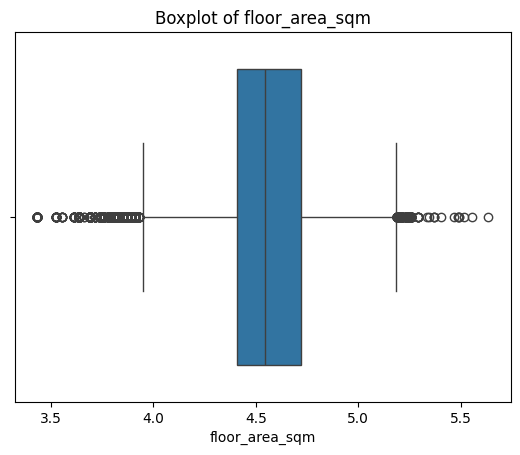

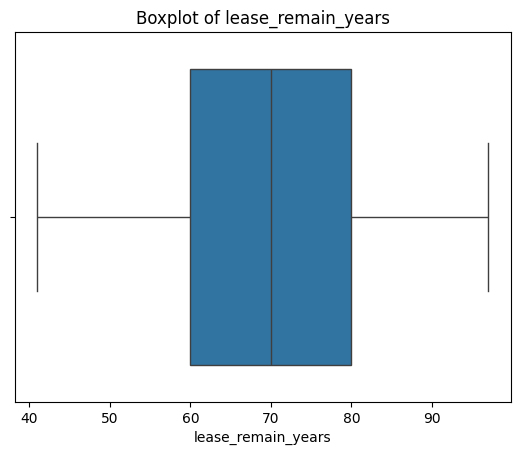

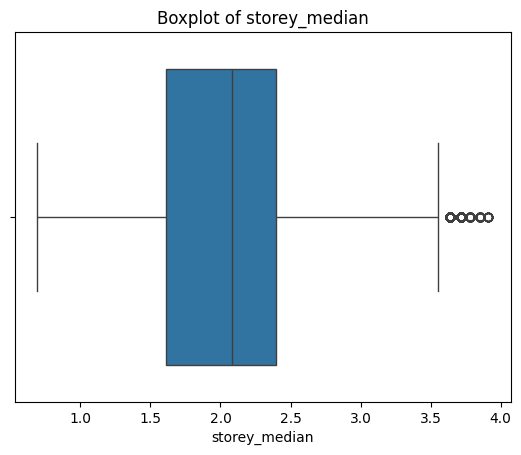

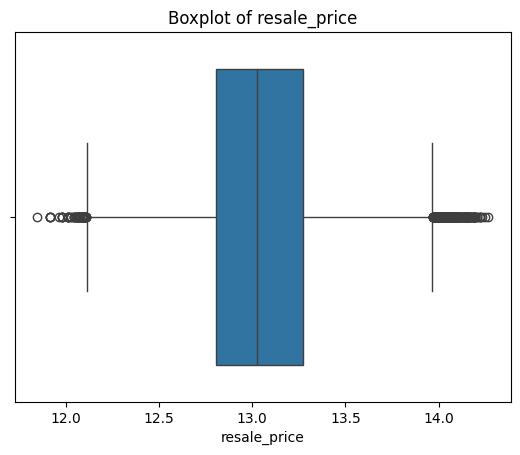

In [19]:
columns = ['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']

def box_plot(columns):

  for i in columns:
    sns.boxplot(data=df2,x=i)
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.show()

box_plot(['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price'])

### After Treating Outliers

In [20]:
def treat_outliers(column):
  for i in column:
    iqr = np.percentile(df2[i],75) - np.percentile(df2[i],25)  # Q3 - Q1
    lower_bound =  np.percentile(df2[i],25) - (1.5 * iqr)
    upper_bound = np.percentile(df2[i],75) + (1.5 * iqr)
    df2[i] = df2[i].clip(lower_bound,upper_bound)
  print('Done !!!!')

treat_outliers(['floor_area_sqm','storey_median','resale_price'])

Done !!!!


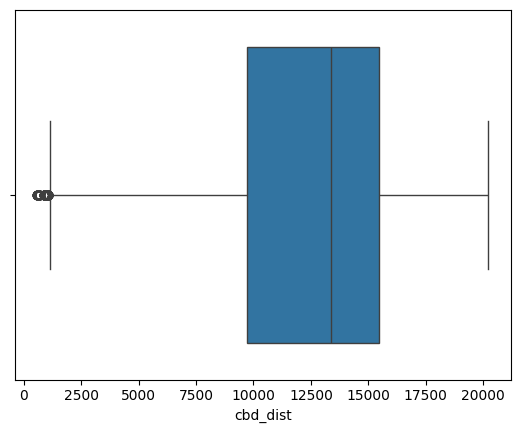

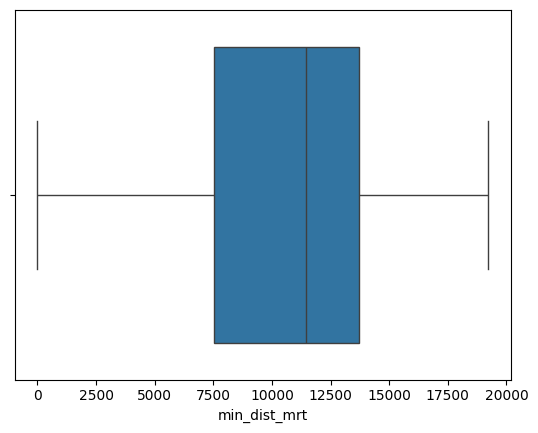

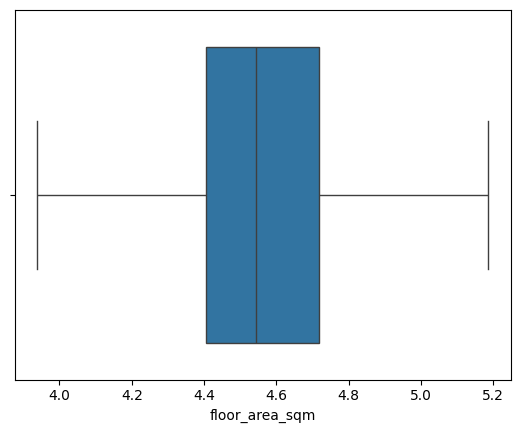

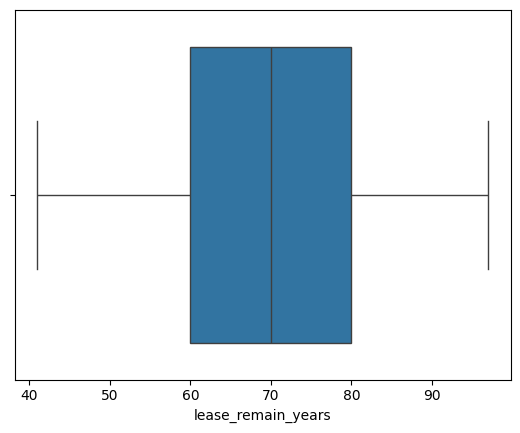

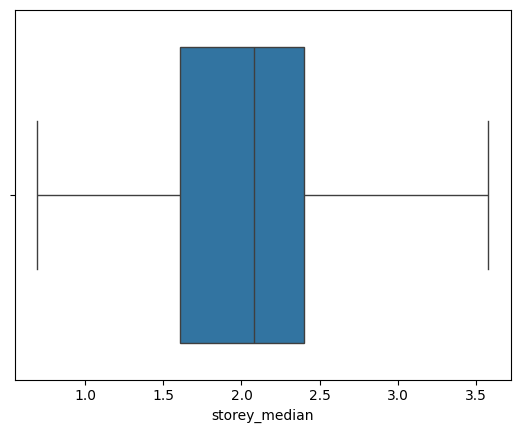

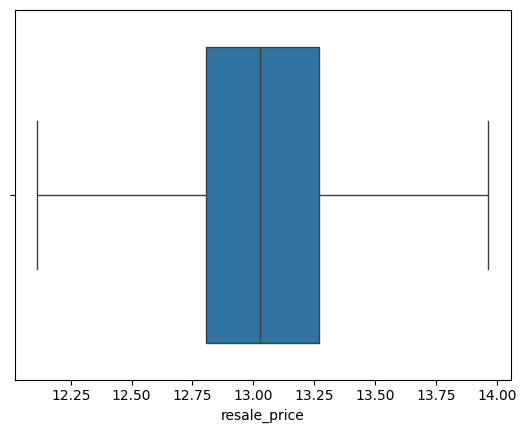

In [21]:
def box_plot(columns):

  for i in columns:
    sns.boxplot(data=df2,x=i)
    plt.show()

box_plot(['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price'])

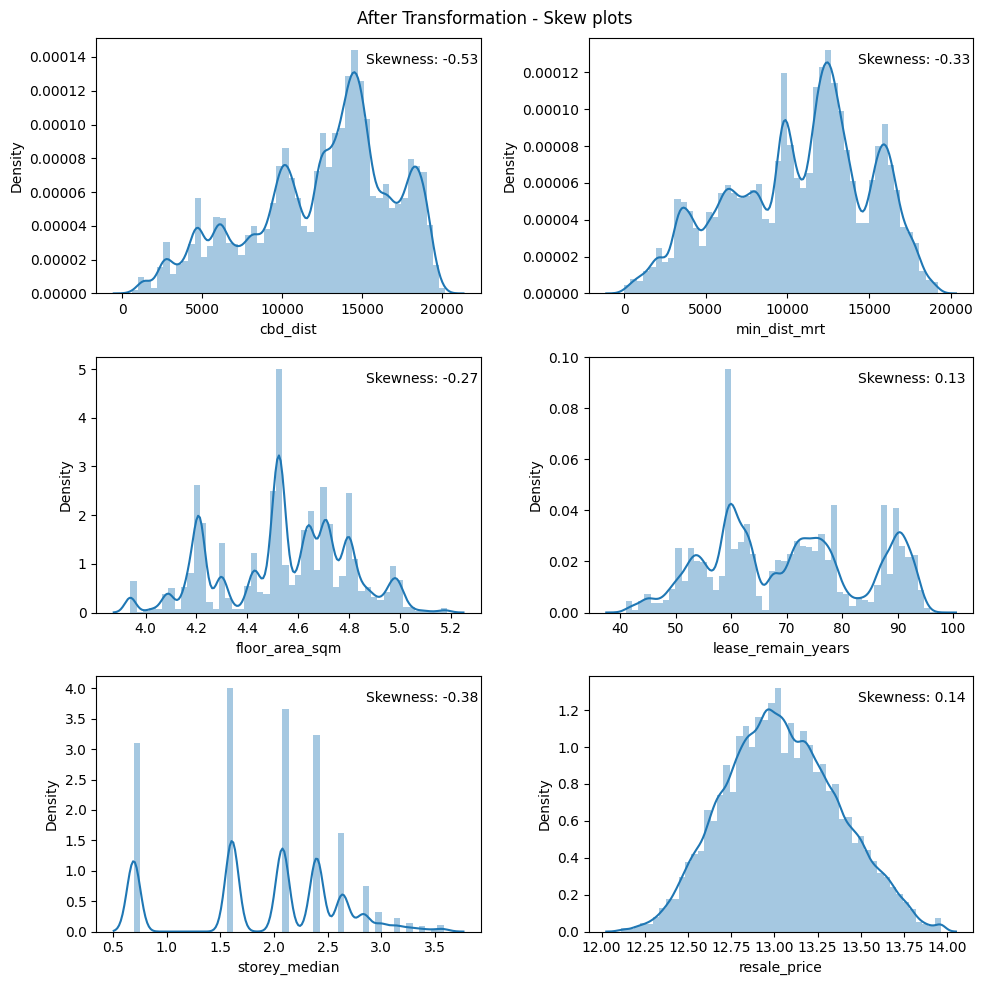

In [24]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
sns.distplot(df2['cbd_dist'])
skew_value = np.round(df2['cbd_dist'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
plt.subplot(3,2,2)
sns.distplot(df2['min_dist_mrt'])
skew_value = np.round(df2['min_dist_mrt'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
plt.subplot(3,2,3)
sns.distplot(df2['floor_area_sqm'])
skew_value = np.round(df2['floor_area_sqm'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
plt.subplot(3,2,4)
sns.distplot(df2['lease_remain_years'])
skew_value = np.round(df2['lease_remain_years'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
plt.subplot(3,2,5)
sns.distplot(df2['storey_median'])
skew_value = np.round(df2['storey_median'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
plt.subplot(3,2,6)
sns.distplot(df2['resale_price'])
skew_value = np.round(df2['resale_price'].skew(), 2)
plt.annotate(f'Skewness: {skew_value}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
plt.suptitle('After Transformation - Skew plots')
plt.tight_layout()
plt.show()

In [23]:
df2.select_dtypes(include=['int64', 'float64']).skew()

cbd_dist             -0.532375
min_dist_mrt         -0.326861
floor_area_sqm       -0.273235
lease_remain_years    0.131943
storey_median        -0.380537
resale_price          0.140993
dtype: float64

In [25]:
SFR_df = df2.copy()

In [26]:
SFR_df

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,10296.855747,7719.813622,4.094345,61,2.079442,12.449019
1,10296.855747,7719.813622,4.094345,61,2.397895,12.524526
2,10296.855747,7719.813622,4.234107,61,1.609438,12.644328
3,10296.855747,7719.813622,3.939050,61,2.079442,12.441145
4,10296.855747,7719.813622,4.110874,61,1.609438,12.577636
...,...,...,...,...,...,...
217551,6213.076992,4312.135688,4.564348,95,1.609438,13.748302
217552,6213.076992,4312.135688,4.564348,95,2.639057,13.774689
217553,14687.959399,13806.706183,3.939050,95,2.833213,12.765688
217554,13718.003504,13045.392845,4.219508,95,2.397895,13.161584


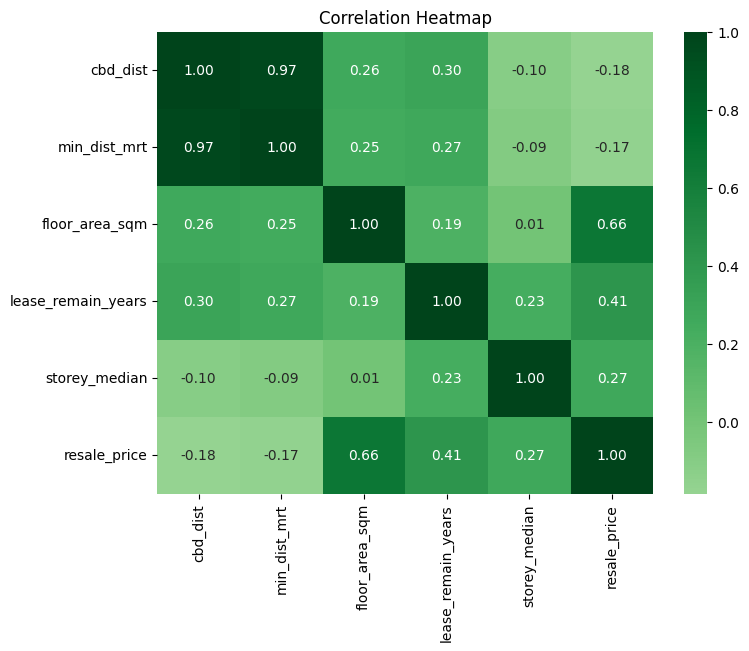

In [27]:
x=SFR_df[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(x, annot=True, fmt=".2f", cmap="Greens", center=0)
plt.title('Correlation Heatmap')
plt.show()

### Encoding Data

In [28]:
from sklearn.preprocessing import StandardScaler

X=SFR_df[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median']]
y=SFR_df['resale_price']

# Normalizing the encoded data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [29]:
test_df = pd.DataFrame(X)
test_df

,0,1,2,3,4
0,-0.490534,-0.703272,-1.816357,-0.674620,0.213220
1,-0.490534,-0.703272,-1.816357,-0.674620,0.657206
2,-0.490534,-0.703272,-1.258627,-0.674620,-0.442056
3,-0.490534,-0.703272,-2.436072,-0.674620,0.213220
4,-0.490534,-0.703272,-1.750396,-0.674620,-0.442056
...,...,...,...,...,...
211216,-1.418972,-1.509028,0.059226,1.822847,-0.442056
211217,-1.418972,-1.509028,0.059226,1.822847,0.993433
211218,0.507774,0.735992,-2.436072,1.822847,1.264124
211219,0.287256,0.555978,-1.316885,1.822847,0.657206


In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

In [31]:
def model_regression(X,y,algorithm):
  for i in algorithm:
    
    xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)
    model = i().fit(xtrain,ytrain)
    
    # predict for train and test accuracy
    y_train_pred = model.predict(xtrain)
    y_test_pred  = model.predict(xtest)

    # Accuracy score
    training = r2_score(ytrain,y_train_pred)
    testing = r2_score(ytest,y_test_pred)
    data = {'Algorithm':i.__name__, 'Training R2 Score':training,'Testing R2 Score':testing}
    print(data)

In [32]:
%%time
model_regression(X,y,[DecisionTreeRegressor,ExtraTreesRegressor,RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor,XGBRegressor])

{'Algorithm': 'DecisionTreeRegressor', 'Training R2 Score': 0.9330919437884742, 'Testing R2 Score': 0.7886227118364051}
{'Algorithm': 'ExtraTreesRegressor', 'Training R2 Score': 0.9333122469572172, 'Testing R2 Score': 0.8045724382069096}
{'Algorithm': 'RandomForestRegressor', 'Training R2 Score': 0.9273847667696502, 'Testing R2 Score': 0.8291273421290208}
{'Algorithm': 'AdaBoostRegressor', 'Training R2 Score': 0.7247150527823125, 'Testing R2 Score': 0.7273183638352632}
{'Algorithm': 'GradientBoostingRegressor', 'Training R2 Score': 0.8118324544623863, 'Testing R2 Score': 0.8123734656607016}
{'Algorithm': 'XGBRegressor', 'Training R2 Score': 0.8663927035120969, 'Testing R2 Score': 0.8595065005544745}
CPU times: total: 1min 32s
Wall time: 1min 28s


In [33]:
%%time
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor
dtr = DecisionTreeRegressor()

# hyperparameters
param_grid = {
    'max_depth': [2, 5, 10, 15, 20, 22],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_pred = best_model.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
training = r2_score(y_train,y_train_pred)
r2 = r2_score(y_test, y_pred)
print(" ")
print('Mean squared error:', mse)
print('Mean Absolute Error', mae)
print('Root Mean squared error:', rmse)
print(" ")
print('R-squared:', r2)
print(" ")
print('Training Accuracy:', training)
print('Test Accuracy:',r2)
print(" ")

Best hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 20, 'min_samples_split': 3}
 
Mean squared error: 0.01650512925502057
Mean Absolute Error 0.10271334173332065
Root Mean squared error: 0.12847228983333553
 
R-squared: 0.8504942568532248
 
Training Accuracy: 0.8718726472473584
Test Accuracy: 0.8504942568532248
 
CPU times: total: 17min 21s
Wall time: 23min 1s


In [34]:
%%time
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Regressor
xgb = XGBRegressor()

# hyperparameters
param_distributions = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2]
}

# randomizedsearchcv
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_distributions, n_iter=50, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)
print("Best hyperparameters:", random_search.best_params_)
best_model1 = random_search.best_estimator_
y_train_pred = best_model1.predict(X_train)
y_pred = best_model1.predict(X_test)

# evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
training = r2_score(y_train,y_train_pred)
r2 = r2_score(y_test, y_pred)

print(" ")
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)
print(" ")
print('R-squared:', r2)
print(" ")
print('Training Accuracy:', training)
print('Test Accuracy:',r2)
print(" ")

Best hyperparameters: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
 
Mean Squared Error: 0.014872110131979473
Mean Absolute Error: 0.09836317660926425
Root Mean Squared Error: 0.12195126129720624
 
R-squared: 0.8652863698861408
 
Training Accuracy: 0.8726175856957522
Test Accuracy: 0.8652863698861408
 
CPU times: total: 31.5 s
Wall time: 1min 55s


In [35]:
best_model1

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Observation & Conclusion

### Prediction with Model

In [43]:
scope_df.loc[[1250]]

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
1250,9010.507337,6305.84556,92.0,54,8.0,463000.0


In [44]:
new_sample = np.array([[9010, 6305, np.log(92), 54, np.log(8)]])
new_sample = scaler.transform(new_sample[:, :5])
new_pred = best_model1.predict(new_sample)[0]
np.exp(new_pred)

434081.88

In [45]:
# Saving the model
import pickle
with open('modelxgb.pkl', 'wb') as file:
    pickle.dump(best_model1, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [22]:
df1 = pd.read_csv(r"C:\Users\SANTHOSH RAJENDRAN\Desktop\GUVI Python\Project-Singaporeflatresale\DummyTraining_Singapore_flat_resale_price_file.csv")